In [1]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
with MPRester("ysmdUA3p65f0e7CxMBwL") as m:
    structure = m.get_structure_by_material_id("mp-961659")
    band = m.get_phonon_bandstructure_by_material_id("mp-961659")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



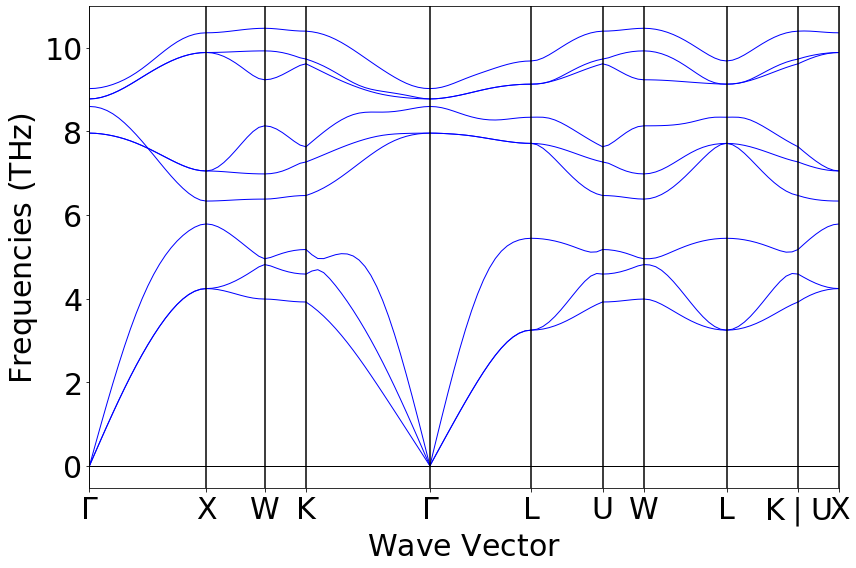

In [4]:
plot = PhononBSPlotter(band)
plot.get_plot()

data = plot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance")
distances = data.get("distances")
label = ticks.get("label")
frequency = data.get("frequency")
lattice = data.get("lattice")

# Direction Γ - L

In [5]:
frequency1 = frequency[4][2]
k_distances = distances[4]
derivative = np.gradient(frequency1, k_distances[1]-k_distances[0])
pente_son = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency1[0]))
approx_son = (pente_son[-1]-pente_son[0])/(k_distances[-1]-k_distances[0])

In [9]:
print("Vitesse du son maximal dans la section observée (courbe verte) : ", np.max(derivative), " (en k =", k_distances[np.argmax(derivative)]),
print("Vitesse du son minimal dans la section observée (courbe verte) : ", np.min(derivative), " (en k =", k_distances[np.argmin(derivative)]),
print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", approx_son)

Vitesse du son maximal dans la section observée (courbe verte) :  10.624003060576344  (en k = 3.1508506287567113
Vitesse du son minimal dans la section observée (courbe verte) :  0.17405474431650036  (en k = 4.087198164594628
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  10.624003060576348


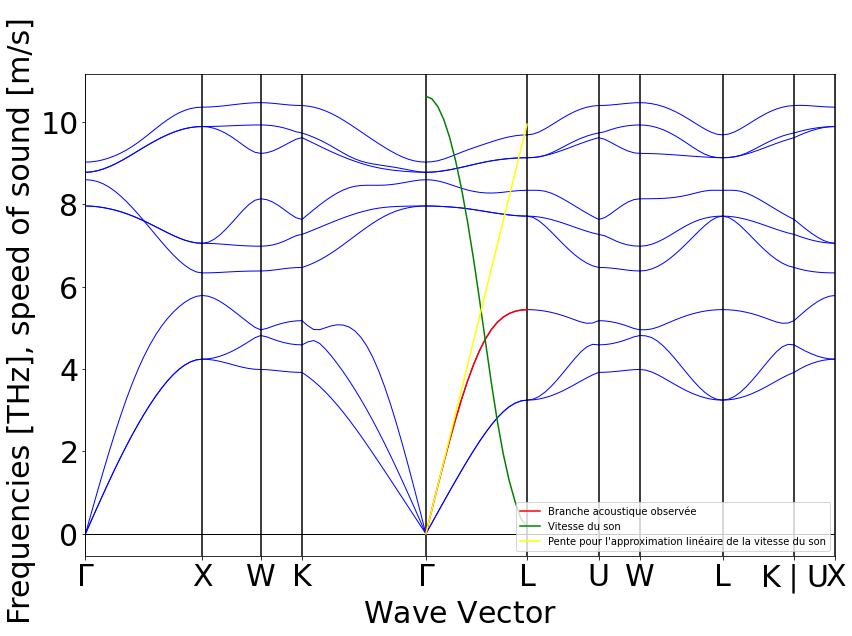

In [10]:
plot.get_plot()
plt.plot(k_distances, frequency1, color="red", label="Branche acoustique observée")
plt.plot(k_distances, derivative, color="green", label="Vitesse du son")
plt.plot(k_distances, pente_son, color="yellow", label="Pente pour l'approximation linéaire de la vitesse du son")
plt.ylabel("Frequencies [THz], speed of sound [m/s] ")
plt.legend()
plt.show()

Ce graphe illustre la vitesse du son d'un phonon dans une bande acoustique de la direction Γ - L de la zone de Brillouin (en rouge). La courbe verte représente la vitesse du son en chaque point de cette direction. Elle atteint un maxima en 
k = 3.15 = Γ avec une vitesse du son qui vaut 10.62 m/s. 
Et un minima en k = 4.08 = L
 avec une vitesse du son qui vaut 0.17 m/s
.

L'approximation de la vitesse du son est donné par la pente de la courbe jaune qui vaut 10.62 m/s
. En comparant avec les données de la courbe verte, on voit bien que cette approximation linéaire n'est valable que pour des faibles valeurs de 
 autour de k = Γ
.

#  Direction W - L

In [13]:
frequency2 = frequency[7][0]
k_distances = distances[7]
derivative = np.gradient(frequency2, k_distances[1]-k_distances[0])
pente_son = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency2[0]))
approx_son = (pente_son[-1]-pente_son[0])/(k_distances[-1]-k_distances[0])
print(derivative)
print(k_distances)

[-0.29487353 -0.55772686 -1.00992027 -1.31104048 -1.4713728  -1.52132333
 -1.48964167 -1.39821501 -1.26285298 -1.0948816  -0.90250597 -0.69194915
 -0.46833764 -0.23625327 -0.11864325]
[5.131558137518812, 5.186167034782676, 5.240775932015958, 5.295384829279821, 5.349993726543684, 5.4046026238075475, 5.45921152104083, 5.513820418304693, 5.568429315568556, 5.623038212801839, 5.677647110065702, 5.732256007329565, 5.786864904593428, 5.8414738018267105, 5.896082699090574]


In [14]:
print("Vitesse du son maximal dans la section observée (courbe verte) : ", np.max(derivative), " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son minimal dans la section observée (courbe verte) : ", np.min(derivative), " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", approx_son)

Vitesse du son maximal dans la section observée (courbe verte) :  -0.11864324639955658  (en k = 5.896082699090574 )
Vitesse du son minimal dans la section observée (courbe verte) :  -1.5213233347336474  (en k = 5.4046026238075475 )
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  -0.29487352658697313


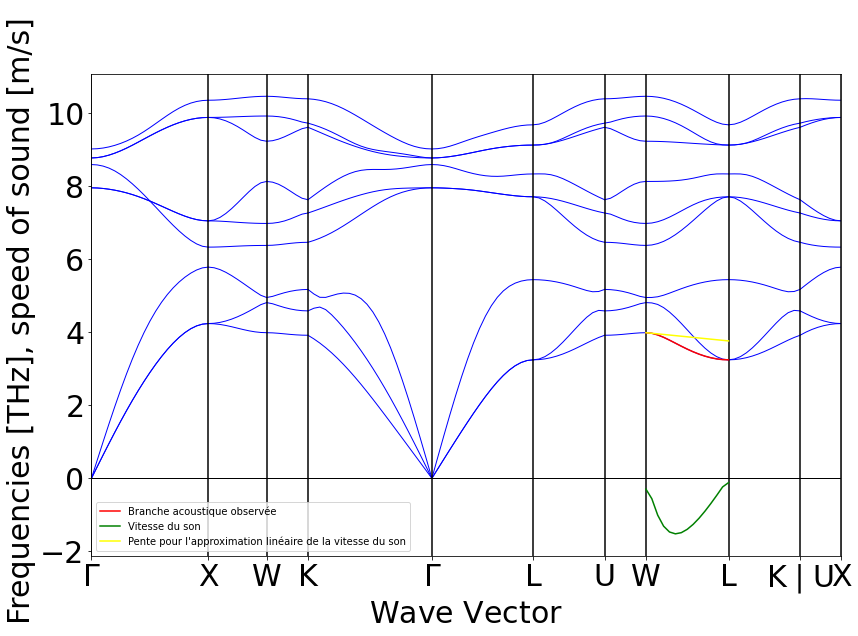

In [15]:
plot.get_plot()
plt.plot(k_distances, frequency2, color="red", label="Branche acoustique observée")
plt.plot(k_distances, derivative, color="green", label="Vitesse du son")
plt.plot(k_distances, pente_son, color="yellow", label="Pente pour l'approximation linéaire de la vitesse du son")
plt.ylabel("Frequencies [THz], speed of sound [m/s] ")
plt.legend()
plt.show()

Ce graphe illustre la vitesse du son d'un phonon dans une bande acoustique de la direction W - L de la zone de Brillouin (en rouge). La courbe verte représente la vitesse du son en chaque point de cette direction. Elle atteint un maxima en 
k = 5.89 = W avec une vitesse du son qui vaut -0.19 m/s. 
Et un minima en k = 5.40 = L
 avec une vitesse du son qui vaut -1.52 m/s
.

L'approximation de la vitesse du son est donné par la pente de la courbe jaune qui vaut -0.30 m/s
. En comparant avec les données de la courbe verte, on voit bien que cette approximation linéaire est une approximation grossière de la solution.
.

#  Direction K - Γ

In [16]:
frequency3 = frequency[3][1]
k_distances = distances[3]
derivative = np.gradient(frequency3, k_distances[1]-k_distances[0])
pente_son = np.add(np.multiply(k_distances, derivative[-1]), np.add(-np.multiply(k_distances[-1], derivative[-1]), frequency3[-1]))
approx_son = (pente_son[-1]-pente_son[0])/(k_distances[-1]-k_distances[0])

In [17]:
print("Vitesse du son maximal dans la section observée (courbe verte) : ", np.max(derivative), " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son minimal dans la section observée (courbe verte) : ", np.min(derivative), " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", approx_son)

Vitesse du son maximal dans la section observée (courbe verte) :  1.3365559383507937  (en k = 2.00406378639907 )
Vitesse du son minimal dans la section observée (courbe verte) :  -5.97340407790662  (en k = 3.1508506287567113 )
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  -5.973404077906619


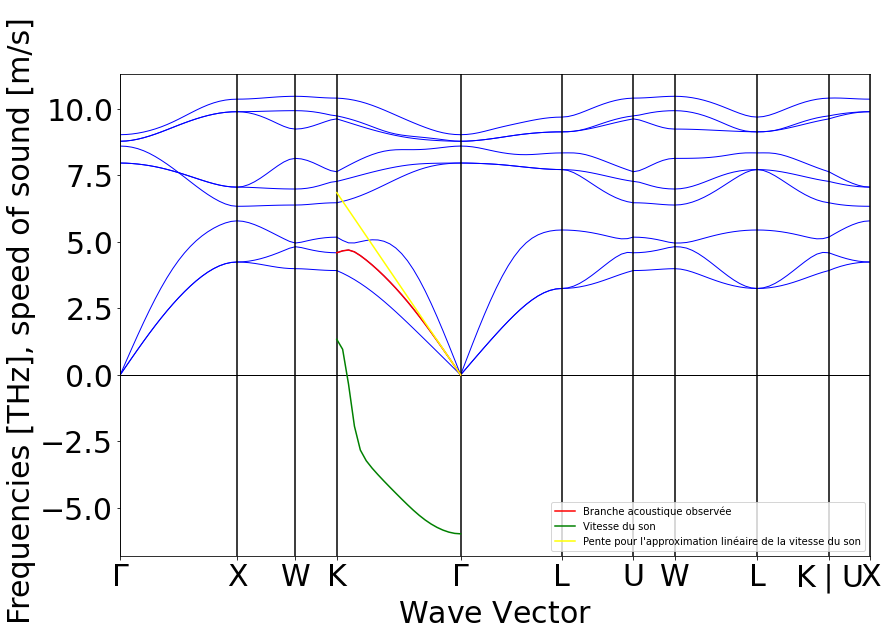

In [18]:
plot.get_plot()
plt.plot(k_distances, frequency3, color="red", label="Branche acoustique observée")
plt.plot(k_distances, derivative, color="green", label="Vitesse du son")
plt.plot(k_distances, pente_son, color="yellow", label="Pente pour l'approximation linéaire de la vitesse du son")
plt.ylabel("Frequencies [THz], speed of sound [m/s] ")
plt.legend()
plt.show()

Ce graphe illustre la vitesse du son d'un phonon dans une bande acoustique de la direction  K - Γ
 de la zone de Brillouin (en rouge). La courbe verte représente la vitesse du son en chaque point de cette direction. Elle atteint un maxima en k = 2.00
 avec une vitesse du son qui vaut 1.34 m/s
 et un minima en 3.15
 avec une vitesse du son qui vaut -5.97 m/s
.

L'approximation de la vitesse du son est donné par la pente de la courbe jaune qui vaut -5.97 m/s
. En comparant avec les données de la courbe verte, on voit bien que cette approximation linéaire n'est valable que pour des faibles valeurs de k
 autour de k =  Γ
.